<a href="https://colab.research.google.com/github/kikiru328/enterprise_analysis/blob/main/Model_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Mounted at /content/drive
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,414 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading datab

In [37]:
#  Directory 변경 (모듈이용)
%pwd
%cd '../content/notebooks'

# module import
## Data Load
from pickle5 import pickle 

## Basic module
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

#waring
import warnings
warnings.filterwarnings('ignore')

[Errno 2] No such file or directory: '../content/notebooks'
/content/drive/My Drive/Colab Notebooks


In [21]:
def 종속변수상관관계(test):
  columns = test.columns.to_list()
  ratio = test.corr()[columns].iloc[-1:].T
  ratio['target'] = np.abs(ratio['target'])
  A = ratio.sort_values(by='target',ascending=False)
  return A

In [ ]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


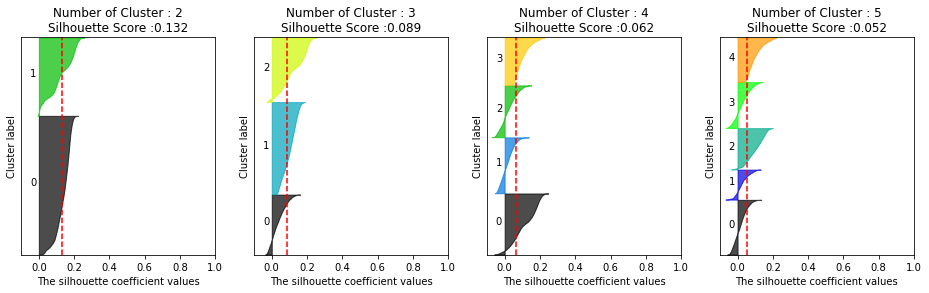

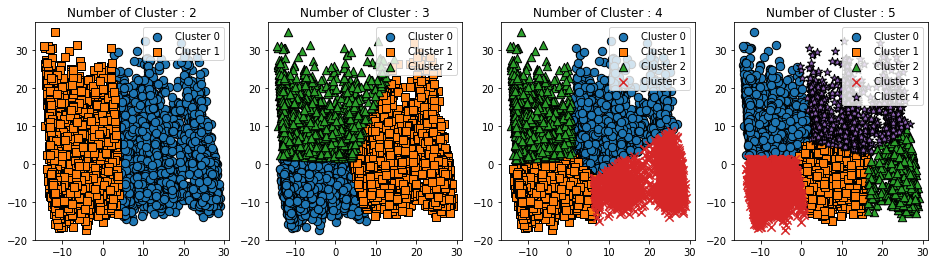

In [ ]:
visualize_silhouette([ 2, 3, 4, 5], test_df[test_df['target']==1])
visualize_kmeans_plot_multi([2,3,4,5],test_df[test_df['target']==1])

# Test2

In [ ]:
print(train.shape)
print(test.shape)

(19085, 45)
(19085, 45)


In [ ]:
# Default
train_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/다중공선성완료_123.pkl'
test_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/다중공선성고려완료_1234.pkl'

In [ ]:
# 산술평균
train_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123_산술평균.pkl'
test_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234_산술평균.pkl'

In [ ]:
# 산술평균 std
train_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123_산술평균_std.pkl'
test_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234_산술평균_std.pkl'

In [ ]:
# std
train_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123_std.pkl'
test_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234_std.pkl'

In [ ]:
# pca columns
train_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123_std_PCA.pkl'
test_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234_std_PCA.pkl'

In [ ]:
# 거주지 바꿈
train_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_123_std_거주지역특성.pkl'
test_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/진짜멘탈터지고 최종/df_ml_1234_std_거주지역특성.pkl'

In [38]:
# 추체선
train_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/1012발표도못하고수정/월별/df_ml_추세선_12.pkl'
test_path = '/content/drive/MyDrive/공유문서/1차 프로젝트/5조/1012발표도못하고수정/월별/df_ml_추세선_123.pkl'

In [8]:
# DataFrame Check

In [66]:
with open(f'{train_path}', 'rb') as train_read:
  train = pickle.load(train_read)
display('[train]' , train.head() )
with open(f'{test_path}', 'rb') as test_read:
  test = pickle.load(test_read)  
display('[test]' , test.head())

print('[columns]', train.columns)

'[train]'

,고객번호,Recency,Frequency,내구재_r,준내구재_r,비내구재_r,사치품_r,가공식품_r,가구/인테리어_r,교육/문화용품_r,기타_r,디지털/가전_r,명품_r,신선식품_r,의류_r,일상용품_r,전문스포츠/레저_r,패션잡화_r,내구재_amt_ratio,준내구재_amt_ratio,비내구재_amt_ratio,사치품_amt_ratio,가공식품_amt_ratio,가구/인테리어_amt_ratio,교육/문화용품_amt_ratio,기타_amt_ratio,디지털/가전_amt_ratio,명품_amt_ratio,신선식품_amt_ratio,의류_amt_ratio,일상용품_amt_ratio,전문스포츠/레저_amt_ratio,패션잡화_amt_ratio,평일_r,A_r,B_r,C_r,D_r,연령대,거주지역랭크,멤버십_가입개수,거주지역랭크_범주,성별_F,성별_M,target
0,1,0.045455,0.283217,0.009435,-0.011110,0.001675,0.000000,0.004543,0.005350,0.000000,-0.000369,0.004302,0.000000,-0.000880,-0.002919,-0.001458,-0.005293,-0.003277,0.043751,-0.023238,-0.020514,0.000000,-0.011547,0.018443,0.000000,-0.000117,0.026659,0.000000,-0.001163,-0.009816,-0.009048,-0.010006,-0.003404,-0.008987,-0.027517,0.015052,0.012465,0.000000,10,35.000000,0,4,0,1,1
1,2,0.101399,-0.227273,-0.003003,0.006709,-0.004872,0.001166,0.011068,-0.000545,0.000999,0.000000,-0.000550,0.001166,-0.016446,0.005079,-0.001773,0.000176,0.000826,-0.005334,0.006971,-0.006771,0.005134,0.001497,-0.003958,0.000154,0.000000,-0.001888,0.005134,-0.000086,0.017561,-0.008040,-0.010822,0.000448,-0.000062,-0.003108,0.003108,0.000000,0.000000,10,18.000000,0,4,0,1,0
2,3,0.055944,0.202797,0.000000,0.000197,-0.000197,0.000000,0.001700,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010382,-0.000056,0.008738,0.000000,0.000000,0.000000,-0.000639,0.000639,0.000000,-0.012227,0.000000,0.000000,0.000000,0.000000,0.000000,-0.003654,-0.001047,0.016928,0.000000,0.000000,-0.006445,-0.000056,0.000507,-0.000450,0.000000,10,10.000000,0,4,0,1,1
3,4,0.286713,-0.391608,0.002786,0.009267,-0.012053,0.000000,-0.007494,0.005320,0.000000,0.000000,0.000000,0.000000,-0.009938,0.004385,0.008063,0.000886,-0.001222,0.009354,-0.001338,-0.008016,0.000000,-0.016138,0.011381,0.000000,0.000000,0.000000,0.000000,-0.006755,0.012544,0.020535,0.002404,-0.023972,-0.002640,-0.027098,0.024341,0.002757,0.000000,10,21.000000,0,4,1,0,1
4,5,-1.384615,-1.730769,0.000183,-0.004295,-0.027298,-0.000058,-0.001581,-0.008639,0.000000,0.000000,-0.000236,-0.000058,-0.016091,-0.001179,-0.000955,-0.000343,-0.002386,0.001742,-0.012738,-0.020258,-0.000214,0.013221,-0.007961,0.000000,0.000000,-0.001056,-0.000214,-0.009634,-0.006037,-0.013231,-0.000879,-0.005677,-0.017634,-0.030926,-0.000543,0.000000,0.000000,10,18.000000,0,4,0,1,1


'[test]'

,고객번호,Recency,Frequency,내구재_r,준내구재_r,비내구재_r,사치품_r,가공식품_r,가구/인테리어_r,교육/문화용품_r,기타_r,디지털/가전_r,명품_r,신선식품_r,의류_r,일상용품_r,전문스포츠/레저_r,패션잡화_r,내구재_amt_ratio,준내구재_amt_ratio,비내구재_amt_ratio,사치품_amt_ratio,가공식품_amt_ratio,가구/인테리어_amt_ratio,교육/문화용품_amt_ratio,기타_amt_ratio,디지털/가전_amt_ratio,명품_amt_ratio,신선식품_amt_ratio,의류_amt_ratio,일상용품_amt_ratio,전문스포츠/레저_amt_ratio,패션잡화_amt_ratio,평일_r,A_r,B_r,C_r,D_r,연령대,거주지역랭크,멤버십_가입개수,거주지역랭크_범주,성별_F,성별_M,target
0,1,-0.051600,-0.053664,0.001159,-0.006906,0.005545,0.000202,0.005287,0.000894,0.000000,-0.000330,0.000363,0.000202,0.004166,-0.001556,-0.004715,-0.002183,-0.002127,0.006292,0.001207,-0.009082,0.001583,-0.005352,0.000743,0.000000,-0.000093,0.002540,0.001583,0.001404,0.008683,-0.006560,-0.003712,0.000764,-0.002501,-0.015252,0.002623,0.012629,0.000000,10,36.000000,0,4,0,1,1
1,2,-0.068111,-0.288958,-0.001671,0.004095,-0.003260,0.000835,0.000521,-0.001016,0.000042,0.000000,-0.000335,0.000835,-0.015609,0.002168,0.013123,-0.001056,0.001328,-0.003519,0.002666,-0.001544,0.002398,-0.002929,-0.000086,0.000007,0.000000,-0.001738,0.002398,-0.004817,0.009550,0.007140,-0.008898,-0.000627,-0.003091,-0.009932,0.001947,0.000000,0.007986,10,16.000000,0,4,0,1,0
2,3,-0.065015,-0.417957,0.000000,-0.000131,0.000131,0.000000,0.001054,0.000000,0.000000,0.000000,0.000000,0.000000,-0.003453,-0.000117,0.002515,0.000000,0.000000,0.000000,-0.002188,0.002188,0.000000,-0.003018,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000302,-0.002164,0.005484,0.000000,0.000000,0.004580,-0.000117,-0.000030,0.000146,0.000000,10,11.000000,0,4,0,1,1
3,4,0.124871,0.048504,0.000106,-0.002835,0.002729,0.000000,-0.002691,0.000914,0.000000,0.000000,0.000000,0.000000,0.004086,-0.001424,0.000482,-0.000622,-0.000745,0.000025,-0.013471,0.013446,0.000000,0.000192,0.000003,0.000000,0.000000,0.000000,0.000000,0.010586,0.005750,0.003989,-0.005948,-0.014572,0.004940,-0.008522,0.008833,-0.000311,0.000000,10,20.000000,0,4,1,0,1
4,5,-0.755418,-1.001032,-0.000277,-0.003349,-0.016893,-0.000120,-0.001785,-0.005683,0.000000,0.000000,-0.000153,-0.000120,-0.010471,-0.000781,0.000268,-0.000349,-0.001564,-0.001512,-0.008215,-0.010471,-0.000443,0.017224,-0.007093,0.000000,0.000000,-0.000686,-0.000443,-0.015238,-0.002489,-0.007049,-0.001053,-0.003813,-0.015107,-0.023082,-0.000267,0.000000,0.002709,10,16.000000,0,4,0,1,1


[columns] Index(['고객번호', 'Recency', 'Frequency', '내구재_r', '준내구재_r', '비내구재_r', '사치품_r',
       '가공식품_r', '가구/인테리어_r', '교육/문화용품_r', '기타_r', '디지털/가전_r', '명품_r',
       '신선식품_r', '의류_r', '일상용품_r', '전문스포츠/레저_r', '패션잡화_r', '내구재_amt_ratio',
       '준내구재_amt_ratio', '비내구재_amt_ratio', '사치품_amt_ratio', '가공식품_amt_ratio',
       '가구/인테리어_amt_ratio', '교육/문화용품_amt_ratio', '기타_amt_ratio',
       '디지털/가전_amt_ratio', '명품_amt_ratio', '신선식품_amt_ratio', '의류_amt_ratio',
       '일상용품_amt_ratio', '전문스포츠/레저_amt_ratio', '패션잡화_amt_ratio', '평일_r', 'A_r',
       'B_r', 'C_r', 'D_r', '연령대', '거주지역랭크', '멤버십_가입개수', '거주지역랭크_범주', '성별_F',
       '성별_M', 'target'],
      dtype='object')


In [44]:
# Train_ Corr check
def get_corr(train, upper_condition_n, most_up_condition_n): 
  cr = train.corr()
  cr_p = cr.unstack()
  cr_v = cr_p.sort_values()
  cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
  A = print(dict(cond))
  return A  
print('corr')

get_corr(train,0.69,1)

corr
{'일상용품_amt_ratio': '일상용품_r', '일상용품_r': '일상용품_amt_ratio', '기타_amt_ratio': '기타_r', '기타_r': '기타_amt_ratio', '준내구재_r': '의류_r', '의류_r': '준내구재_r', '디지털/가전_r': '내구재_r', '내구재_r': '디지털/가전_r', '내구재_amt_ratio': '디지털/가전_amt_ratio', '디지털/가전_amt_ratio': '내구재_amt_ratio', '사치품_amt_ratio': '명품_amt_ratio', '명품_amt_ratio': '사치품_amt_ratio', '명품_r': '사치품_r', '사치품_r': '명품_r'}


In [41]:
# Target _ Corr Check
종속변수상관관계(test)

,target
target,1.000000
Frequency,0.433018
Recency,0.263779
비내구재_amt_ratio,0.210870
준내구재_amt_ratio,0.192852
가공식품_amt_ratio,0.183953
내구재_amt_ratio,0.170464
의류_amt_ratio,0.162345
사치품_amt_ratio,0.150215
명품_amt_ratio,0.140808


In [67]:
# Final columns
train_test_columns = [ 'Recency', 'Frequency', '내구재_r', '준내구재_r', '비내구재_r', '사치품_r',
       '내구재_amt_ratio',
       '준내구재_amt_ratio', '비내구재_amt_ratio', '사치품_amt_ratio', '가공식품_amt_ratio',
       '가구/인테리어_amt_ratio', '교육/문화용품_amt_ratio', '기타_amt_ratio',
        '신선식품_amt_ratio', '의류_amt_ratio',
       '일상용품_amt_ratio', '전문스포츠/레저_amt_ratio', '패션잡화_amt_ratio', '평일_r', 'A_r',
       'B_r', 'C_r', 'D_r', '연령대', '멤버십_가입개수', '거주지역랭크', '성별_F',
       '성별_M', 'target']
train = train[train_test_columns]
test = test[train_test_columns]

/content/drive/MyDrive/공유문서/1차 프로젝트/5조/1012발표도못하고수정/월별/df_ml_추세선_12.pkl
<Train>
corr
{}



100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


[model] LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

[confusion_matrix]         pred:0  pred:1
true:0    1264     701
true:1     643    1209 

[accuracy]: 0.6479
[precision]: 0.6479
[recall]: 0.6528
[f1_score]: 0.6427
[roc_auc]: 0.7062
----------------------------------------------------------------------
[model] SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False) 

[confusion_matrix]         pred:0  pred:1
true:0    1078     887
true:1     533    1319 

[accuracy]: 0.6280
[precision]: 0.6280
[recall]: 0.7122
[f1_s

100%|██████████| 4/4 [00:14<00:00,  3.52s/it]



[model] LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

[confusion_matrix]         pred:0  pred:1
true:0    5925    3884
true:1    1339    7937 

[accuracy]: 0.7263
[precision]: 0.7263
[recall]: 0.8556
[f1_score]: 0.7524
[roc_auc]: 0.8226
----------------------------------------------------------------------
[model] SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False) 

[confusion_matrix]         pred:0  pred:1
true:0    4618    5191
true:1    1217    8059 

[accuracy]: 0.6642
[precision]: 0.6642
[recall]: 0.8688
[f1_

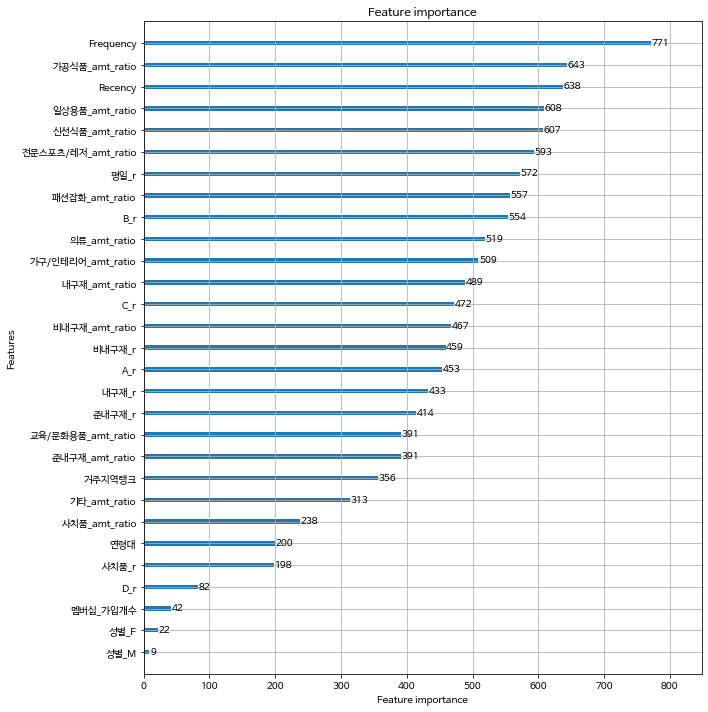

In [68]:
print(train_path)
## Train

print('<Train>')

def get_corr(train, upper_condition_n, most_up_condition_n): 
  cr = train.corr()
  cr_p = cr.unstack()
  cr_v = cr_p.sort_values()
  cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
  A = print(dict(cond))
  return A  
print('corr')
get_corr(train,0.69,1)

print()


from sklearn.model_selection import train_test_split
X = train.drop('target',axis=1)
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

lr = LogisticRegression()
svm = SVC(probability=True)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


from tqdm import tqdm
models = [lr,svm,dt,rf]
for model in tqdm(models):
    model.fit(X_train,y_train)

def varName(p):
    for k, v in globals().items():
        if id(p) == id(v):
            return k

for model in tqdm(models):
    globals()[f'{varName(model)}_pred'] = model.predict(X_test)


for model in tqdm(models):
    globals()[f'{varName(model)}_proba'] = model.predict_proba(X_test)[:,1]

def get_eval(name,y_test,prediction,proba):
    Label = np.unique([y_test, prediction])
    confusion= pd.DataFrame(confusion_matrix(y_test, prediction, labels=Label), 
                            index=['true:{:}'.format(x) for x in Label], 
                            columns=['pred:{:}'.format(x) for x in Label])
    accuracy = accuracy_score(y_test,prediction)
    precision = precision_score(y_test,prediction)
    recall = recall_score(y_test,prediction)
    f1 = f1_score(y_test,prediction)
    roc_auc = roc_auc_score(y_test,proba)
    print('[model]', name,'\n')
    print('[confusion_matrix]', confusion,'\n')
    print('[accuracy]: {:.4f}'.format(accuracy))
    print('[precision]: {:.4f}'.format(accuracy))
    print('[recall]: {:.4f}'.format(recall))
    print('[f1_score]: {:.4f}'.format(f1))
    print('[roc_auc]: {:.4f}'.format(roc_auc))
    print('-------'*10)

predicts = [lr_pred,svm_pred,dt_pred,rf_pred]
probas= [lr_proba, svm_proba, dt_proba, rf_proba]


from xgboost import XGBClassifier

evals = [(X_test,y_test)]
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1,max_depth =3)
xgb.fit(X_train,y_train)
xgb_preds = xgb.predict(X_test)
xgb_preds_proba = xgb.predict_proba(X_test)[:,1]

from lightgbm import LGBMClassifier
lgbm =LGBMClassifier(n_estimators=400)
evals= [(X_test,y_test)]
lgbm.fit(X_train, y_train)
lgbm_preds = lgbm.predict(X_test)
lgbm_preds_proba = lgbm.predict_proba(X_test)[:,1]


for name,predict, proba in zip(models, predicts , probas):
  get_eval(name,y_test,predict,proba)


get_eval(xgb,y_test,xgb_preds,xgb_preds_proba)
get_eval(lgbm,y_test,lgbm_preds,lgbm_preds_proba)


print()


print(test_path)

# TEST
print('<TEST>')


print('corr')
get_corr(test,0.69,1)
print()


검증 = test.drop('target',axis=1)
정확도검증 = test['target']

models = [lr,svm,dt,rf]
def varName(p):
    for k, v in globals().items():
        if id(p) == id(v):
            return k

for model in tqdm(models):
    globals()[f'{varName(model)}_pred'] = model.predict(검증)

for model in tqdm(models):
    globals()[f'{varName(model)}_proba'] = model.predict_proba(검증)[:,1]

xgb_preds = xgb.predict(검증)
xgb_preds_proba = xgb.predict_proba(검증)[:,1]

lgbm_preds = lgbm.predict(검증)
lgbm_preds_proba = lgbm.predict_proba(검증)[:,1]

print()
predicts = [lr_pred,svm_pred,dt_pred,rf_pred]
probas= [lr_proba, svm_proba, dt_proba, rf_proba]

for name,predict,proba in zip(models, predicts,probas):
  get_eval(name,정확도검증,predict,proba)

get_eval(xgb,정확도검증,xgb_preds,xgb_preds_proba)
get_eval(lgbm,정확도검증,lgbm_preds,lgbm_preds_proba)

print()
print('lgbm Feature importance')
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm,ax=ax)

In [69]:
# Train_test_columns
train.columns

Index(['Recency', 'Frequency', '내구재_r', '준내구재_r', '비내구재_r', '사치품_r',
       '내구재_amt_ratio', '준내구재_amt_ratio', '비내구재_amt_ratio', '사치품_amt_ratio',
       '가공식품_amt_ratio', '가구/인테리어_amt_ratio', '교육/문화용품_amt_ratio',
       '기타_amt_ratio', '신선식품_amt_ratio', '의류_amt_ratio', '일상용품_amt_ratio',
       '전문스포츠/레저_amt_ratio', '패션잡화_amt_ratio', '평일_r', 'A_r', 'B_r', 'C_r',
       'D_r', '연령대', '멤버십_가입개수', '거주지역랭크', '성별_F', '성별_M', 'target'],
      dtype='object')